#Object detection on Raspberry Pi using YOLO detector


This project has been created to train a YOLOv8 model do detect some of the most common pest animals in North American garden. This model will be used in a smart garden IoT device.  

#Import

Import Google drive content

In [ ]:
#import the required libraries
import pathlib
import os

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


Import libraries

In [ ]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Setup complete ✅ (12 CPUs, 53.0 GB RAM, 30.2/201.2 GB disk)


In [ ]:
from IPython import display
from IPython.display import Image
display.clear_output()

Define paths to dataset

In [ ]:
# Defining the path for train and test images
"""This dataset was handcrafted with open source animals pictures and assembled on Roboflow.com"""
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8/train/")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8/test/")
data_dir_valid = pathlib.Path("/content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8/valid/")
data_dir = pathlib.Path("/content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8/data.yaml/")

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


#Training

In [ ]:
%cd {HOME}
!yolo task=detect mode='train' model=yolov8s.pt data={"/content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8"}/data.yaml epochs=100 imgsz=640 plots=true

/content
100% 21.5M/21.5M [00:00<00:00, 240MB/s]
Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=F

Result

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	train_batch811.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch812.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1719217709.80298247ab15.1739.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch810.jpg


/content


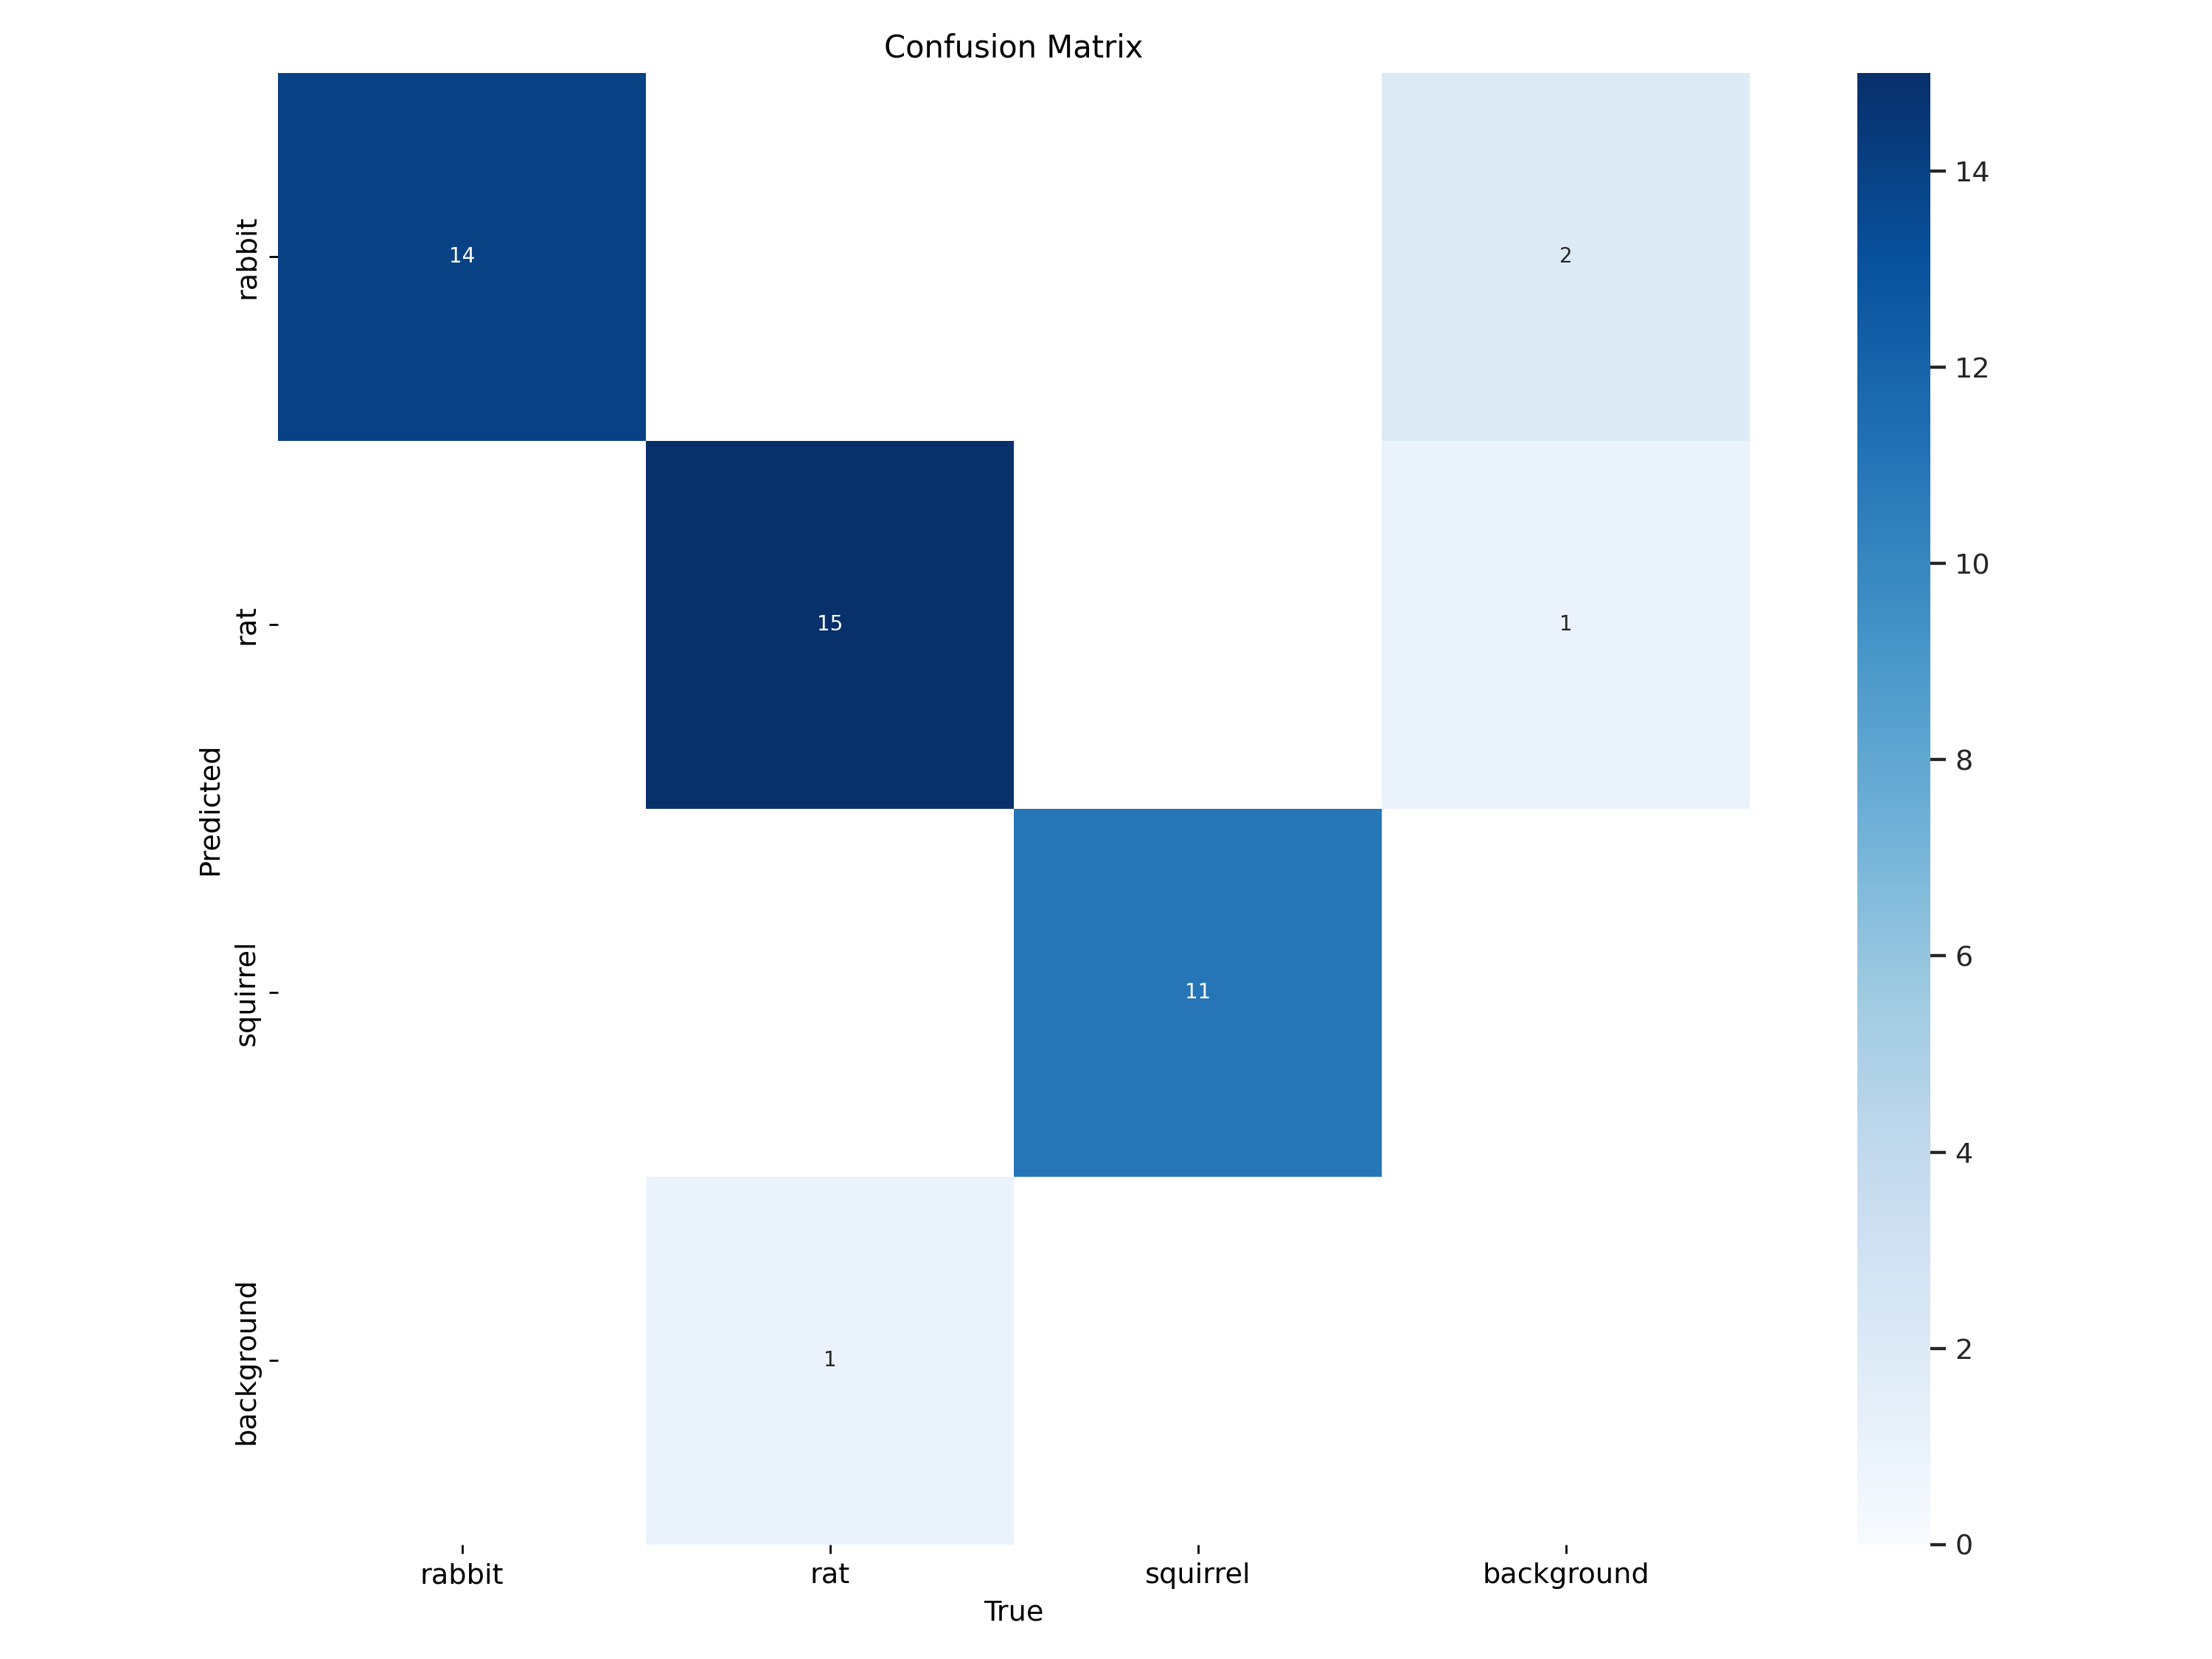

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


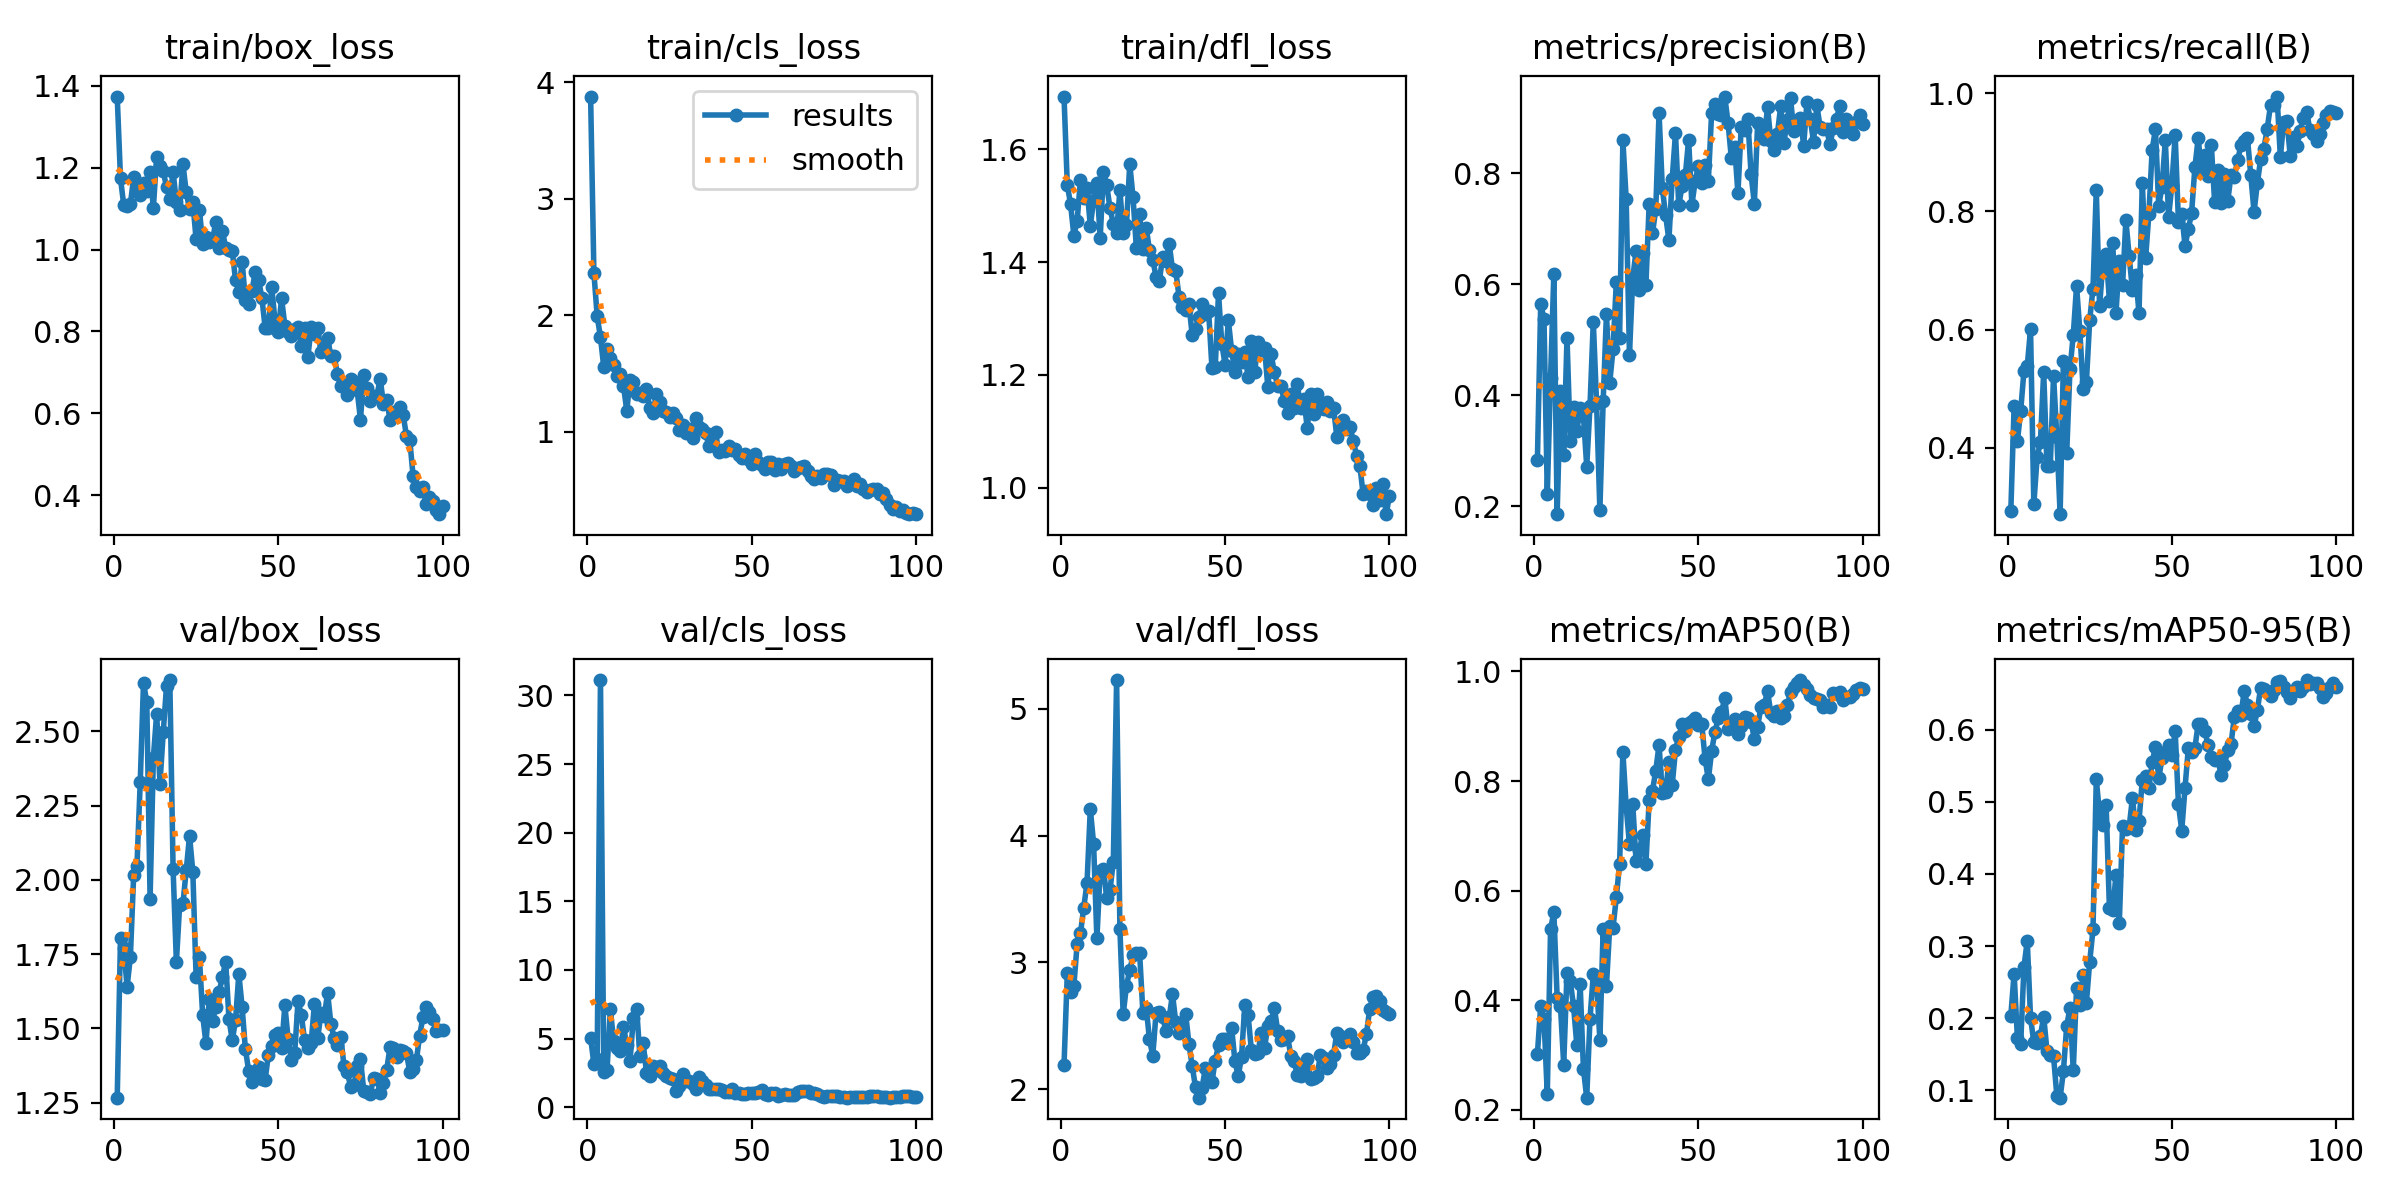

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


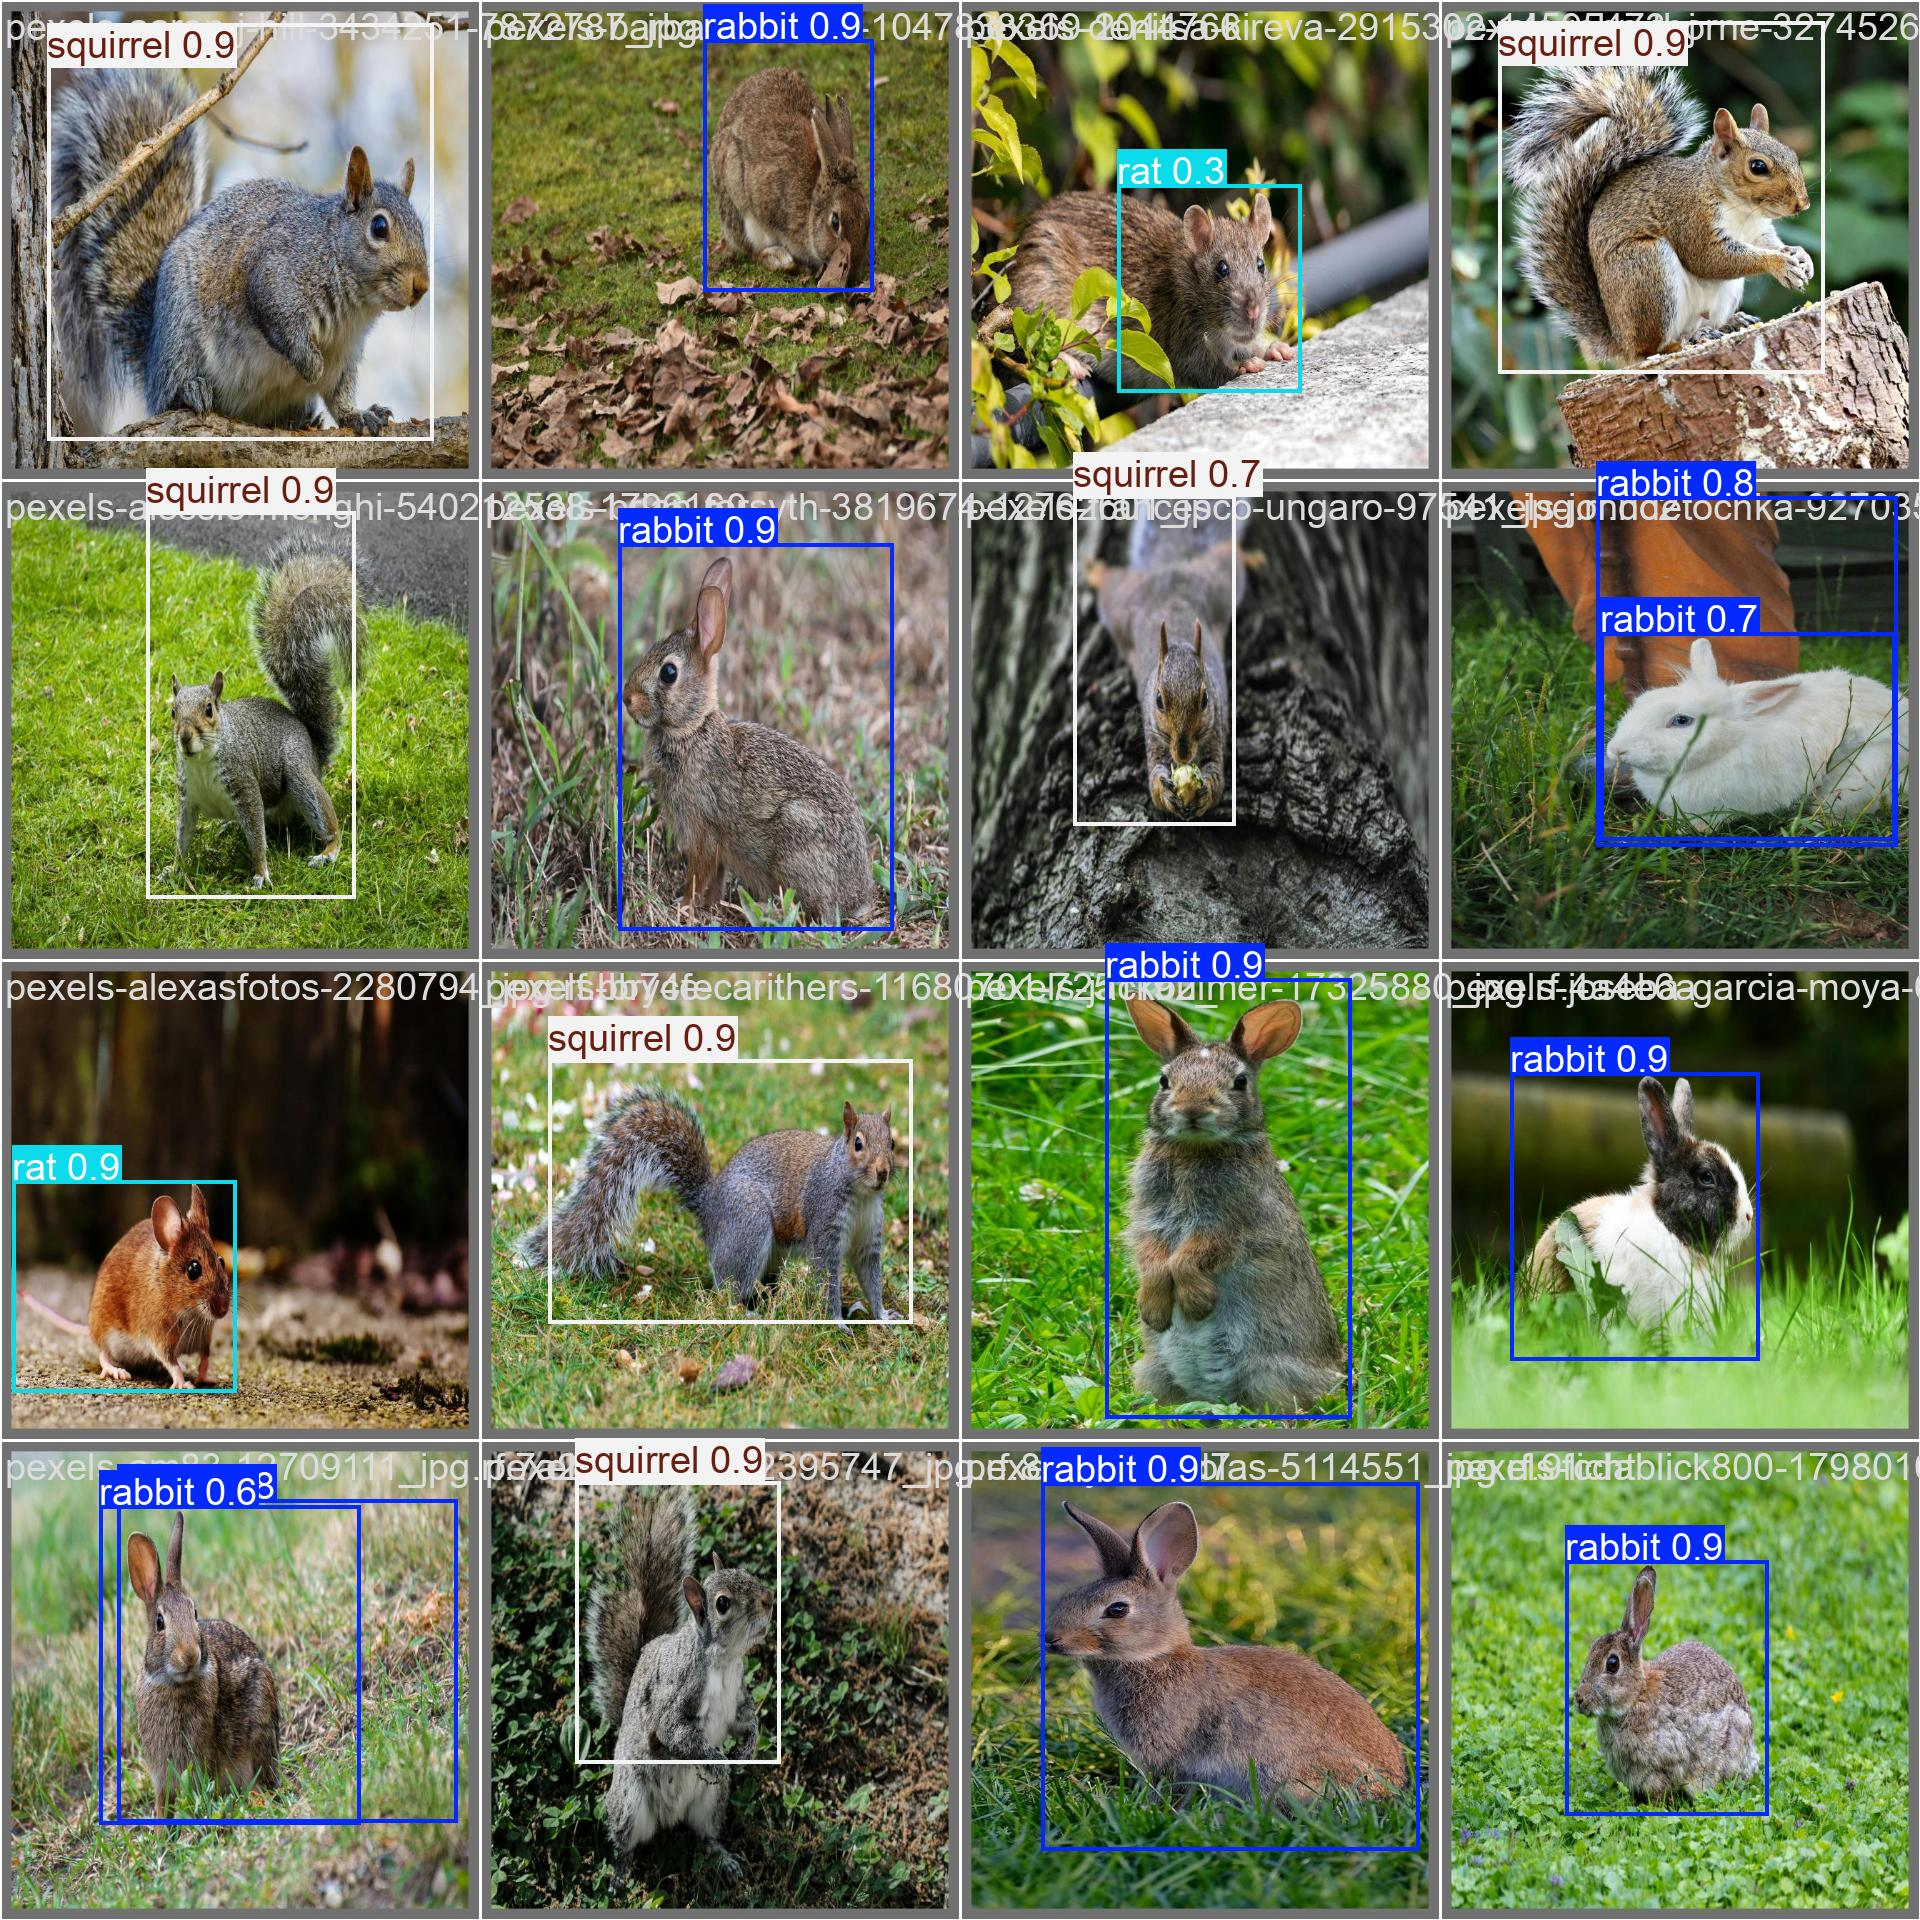

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={"/content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8"}/test/images

Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/20 /content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8/test/images/pexels-am83-12514765_jpg.rf.d2f03f6f5dc87ad94e68460440ea4195.jpg: 640x640 1 rabbit, 7.6ms
image 2/20 /content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8/test/images/pexels-am83-17480620_jpg.rf.01fdbb513449db0e12b5179bb4fce36b.jpg: 640x640 1 rabbit, 9.3ms
image 3/20 /content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8/test/images/pexels-brendan-christopher-1513747-10398545_jpg.rf.7fcf25150538f57a073bab0238549899.jpg: 640x640 1 rat, 7.7ms
image 4/20 /content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8/test/images/pexels-connor-danylenko-534256-3075556_jpg.rf.d4e4fd12c5f264c7ab5479567de79494.jpg: 640x640 1 squirrel, 7.6ms
image 5/20 /conten

In [ ]:
!ls {HOME}/runs/detect/predict/

pexels-am83-12514765_jpg.rf.d2f03f6f5dc87ad94e68460440ea4195.jpg
pexels-am83-17480620_jpg.rf.01fdbb513449db0e12b5179bb4fce36b.jpg
pexels-brendan-christopher-1513747-10398545_jpg.rf.7fcf25150538f57a073bab0238549899.jpg
pexels-connor-danylenko-534256-3075556_jpg.rf.d4e4fd12c5f264c7ab5479567de79494.jpg
pexels-denitsa-kireva-2915302-14399486_jpg.rf.2e0035f04ce82dffc931bf9ef4c503e1.jpg
pexels-denitsa-kireva-2915302-9783106_jpg.rf.fee7a45b1d100b1671d48b7648efcff3.jpg
pexels-denniz-futalan-339724-5049271_jpg.rf.ae580bbffe593d619a734055ddf4fc8a.jpg
pexels-jiri-mikolas-6546559_jpg.rf.a2e97a757a2e0bc3d4fa2db69e84fae9.jpg
pexels-lebele-19852806_jpg.rf.e52d3826674675aef0eba4c0830daccb.jpg
pexels-lureofadventure-10772345_jpg.rf.529b70ec406fb948da50c30e252cd285.jpg
pexels-magda-ehlers-pexels-1327599_jpg.rf.73d4d22a907d195df1fd5d3fe1f6e2be.jpg
pexels-man-dy-1082179_jpg.rf.0555d687256e8c1c4f81153460682bc3.jpg
pexels-ricardo-olvera-225422504-20456455_jpg.rf.963e5d32743468402182dffce1edab14.jpg
pexels-r

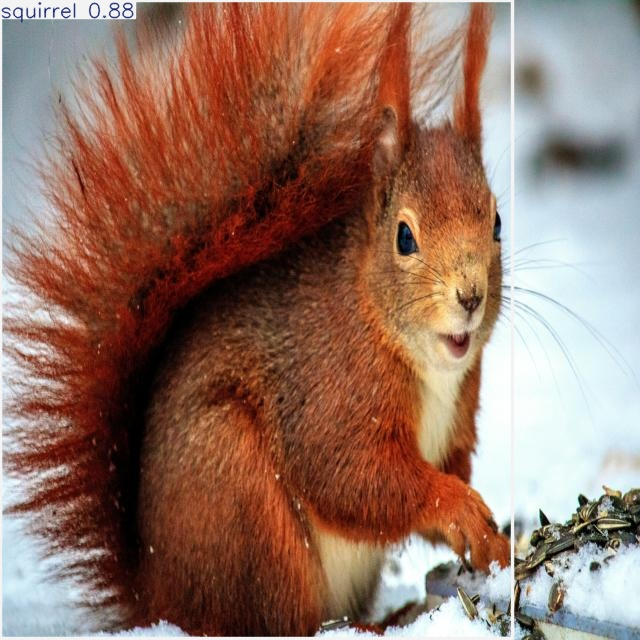

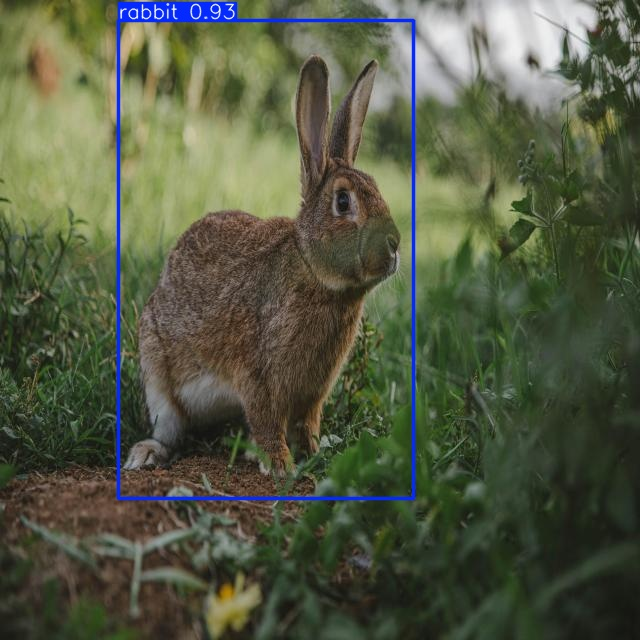

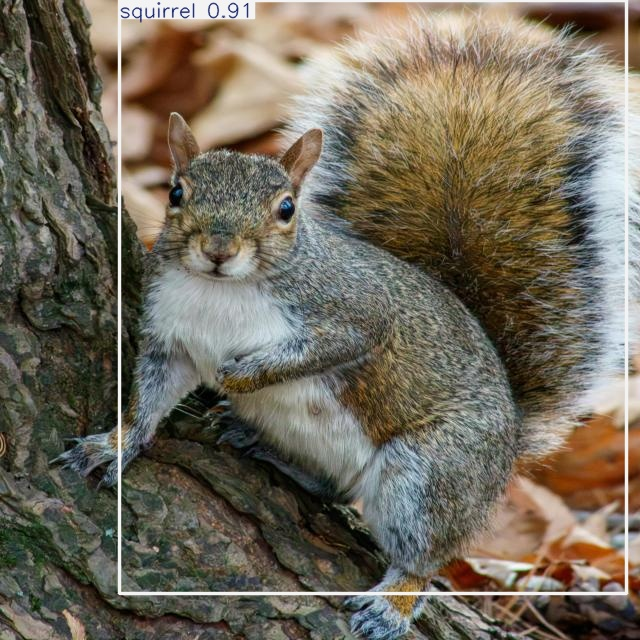

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

#Validate custom model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={"/content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8"}/data.yaml

/content
Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8/valid/labels.cache... 41 images, 0 backgrounds, 0 corrupt: 100% 41/41 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.22it/s]
                   all         41         41 

In [ ]:
!ls {HOME}/runs/detect/val3/

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg    val_batch2_labels.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg  val_batch2_pred.jpg


/content


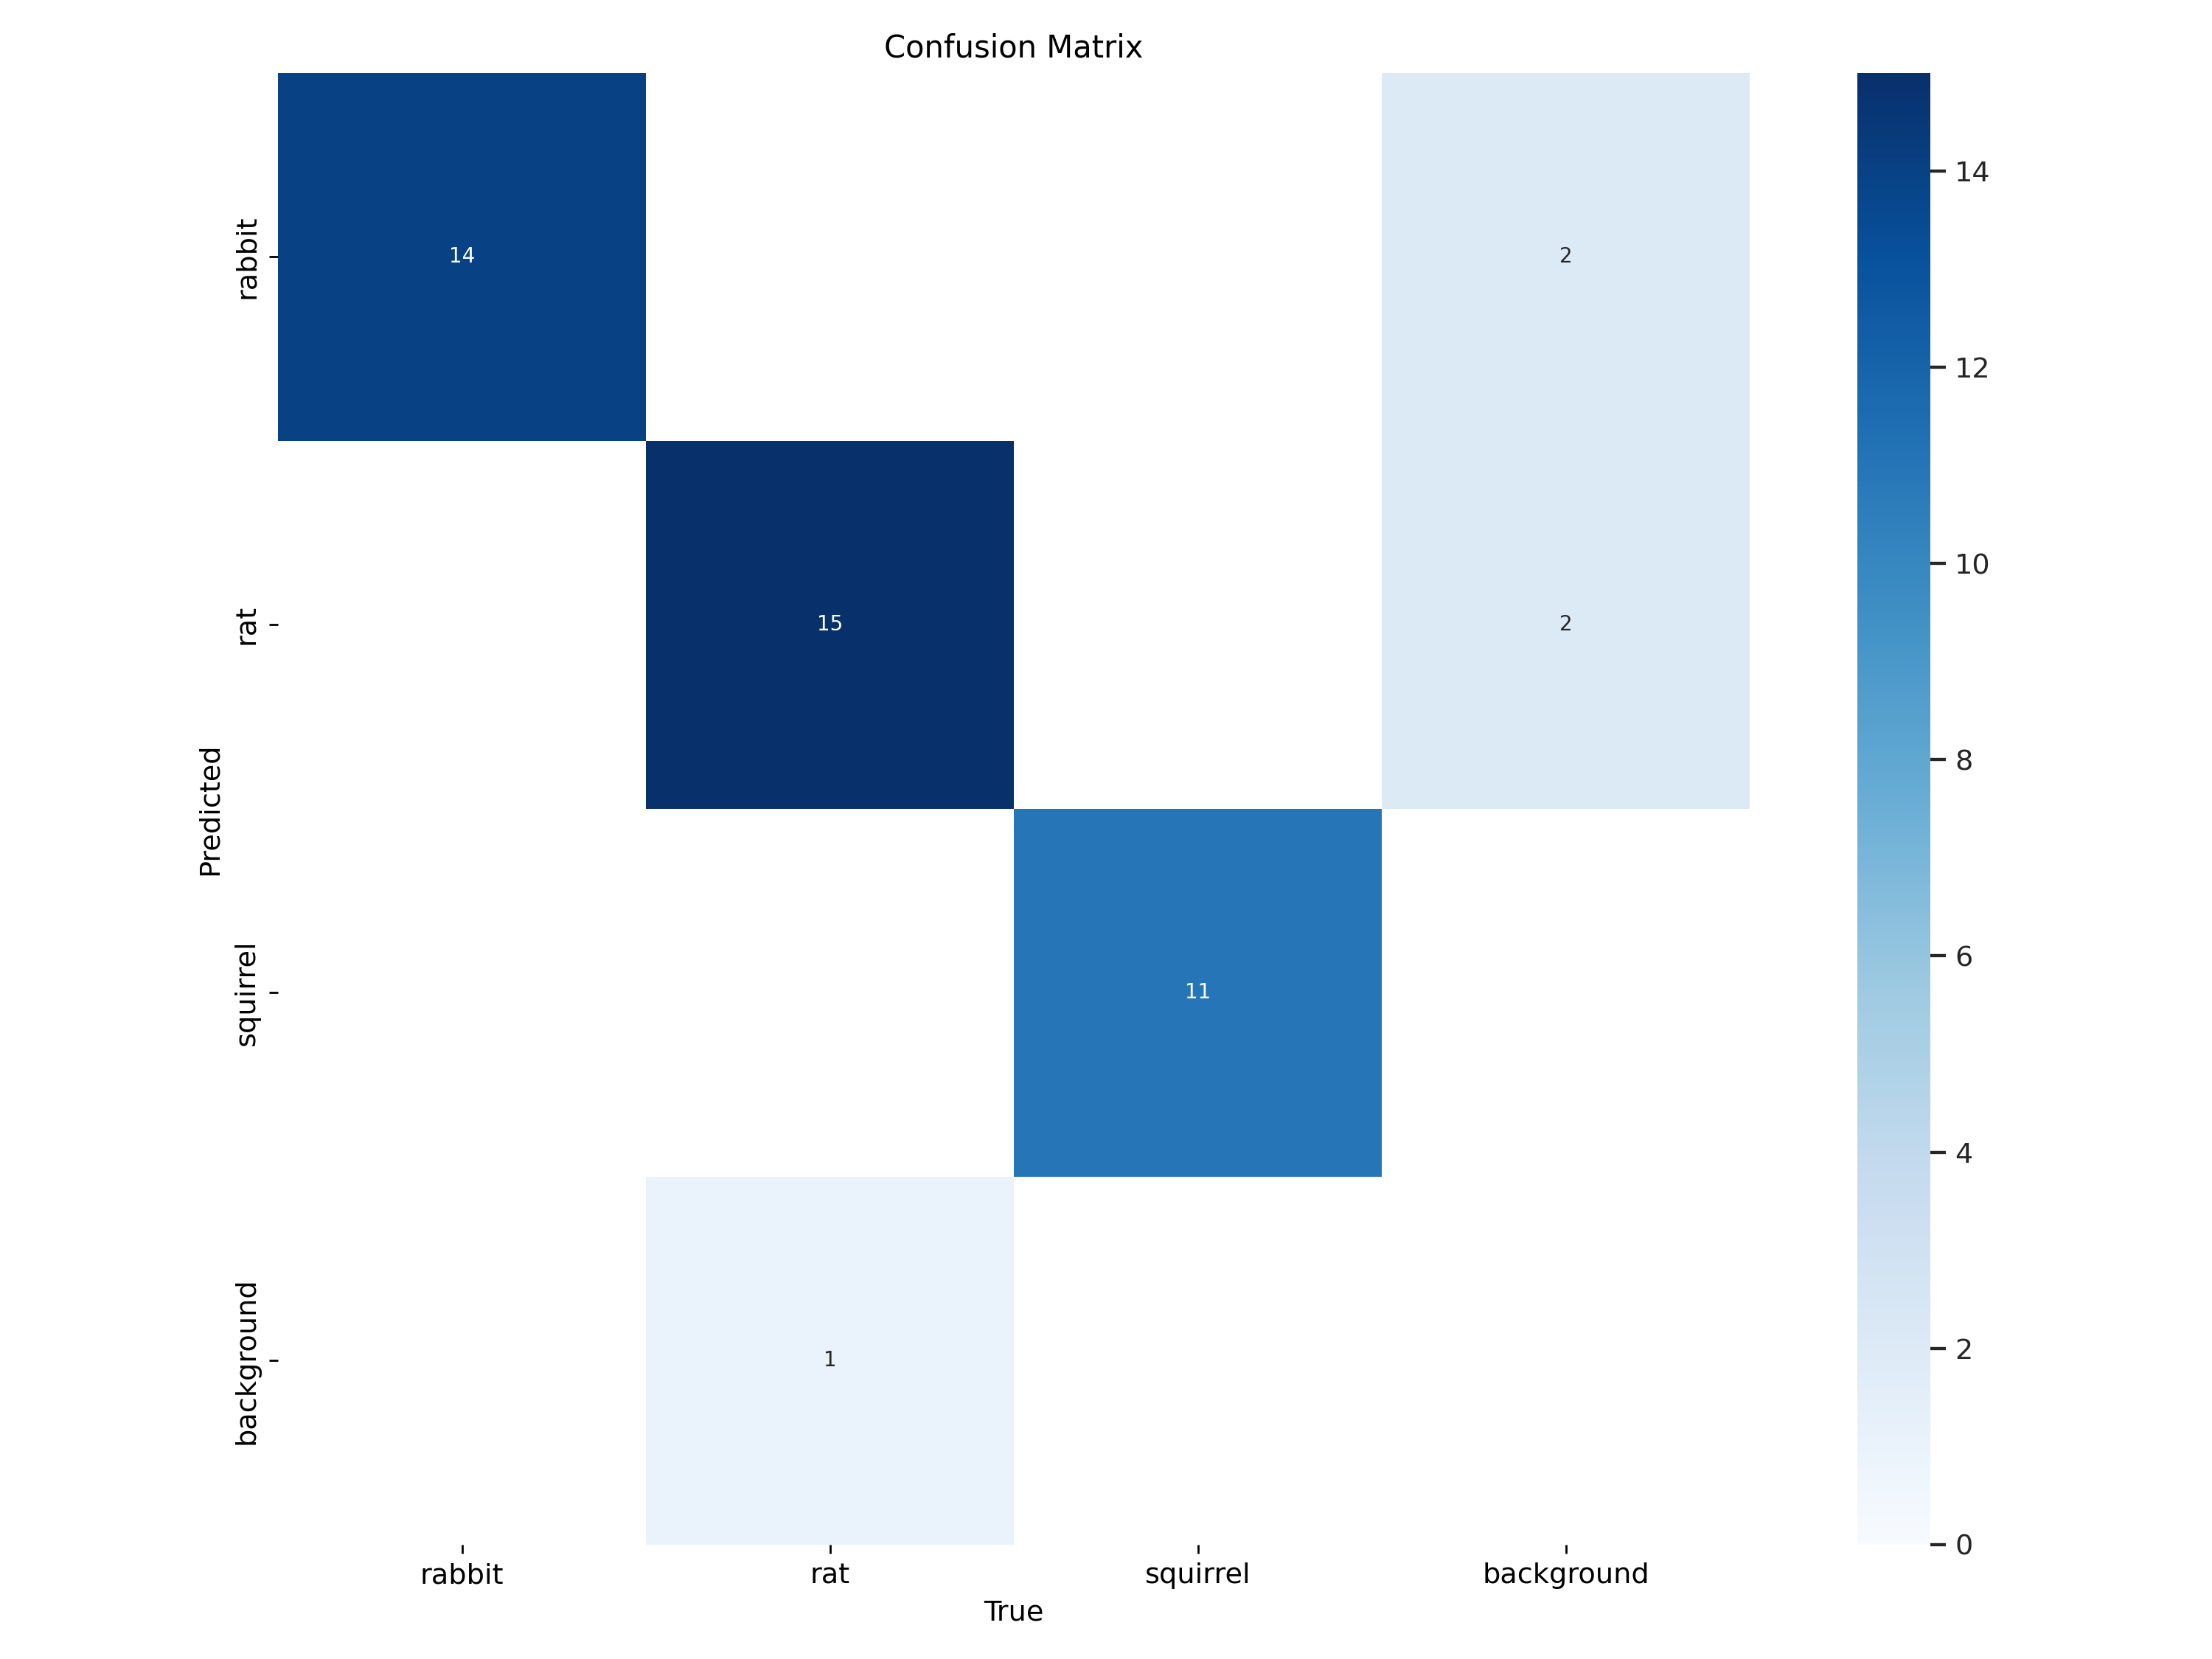

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val3/confusion_matrix.png', width=600)

/content


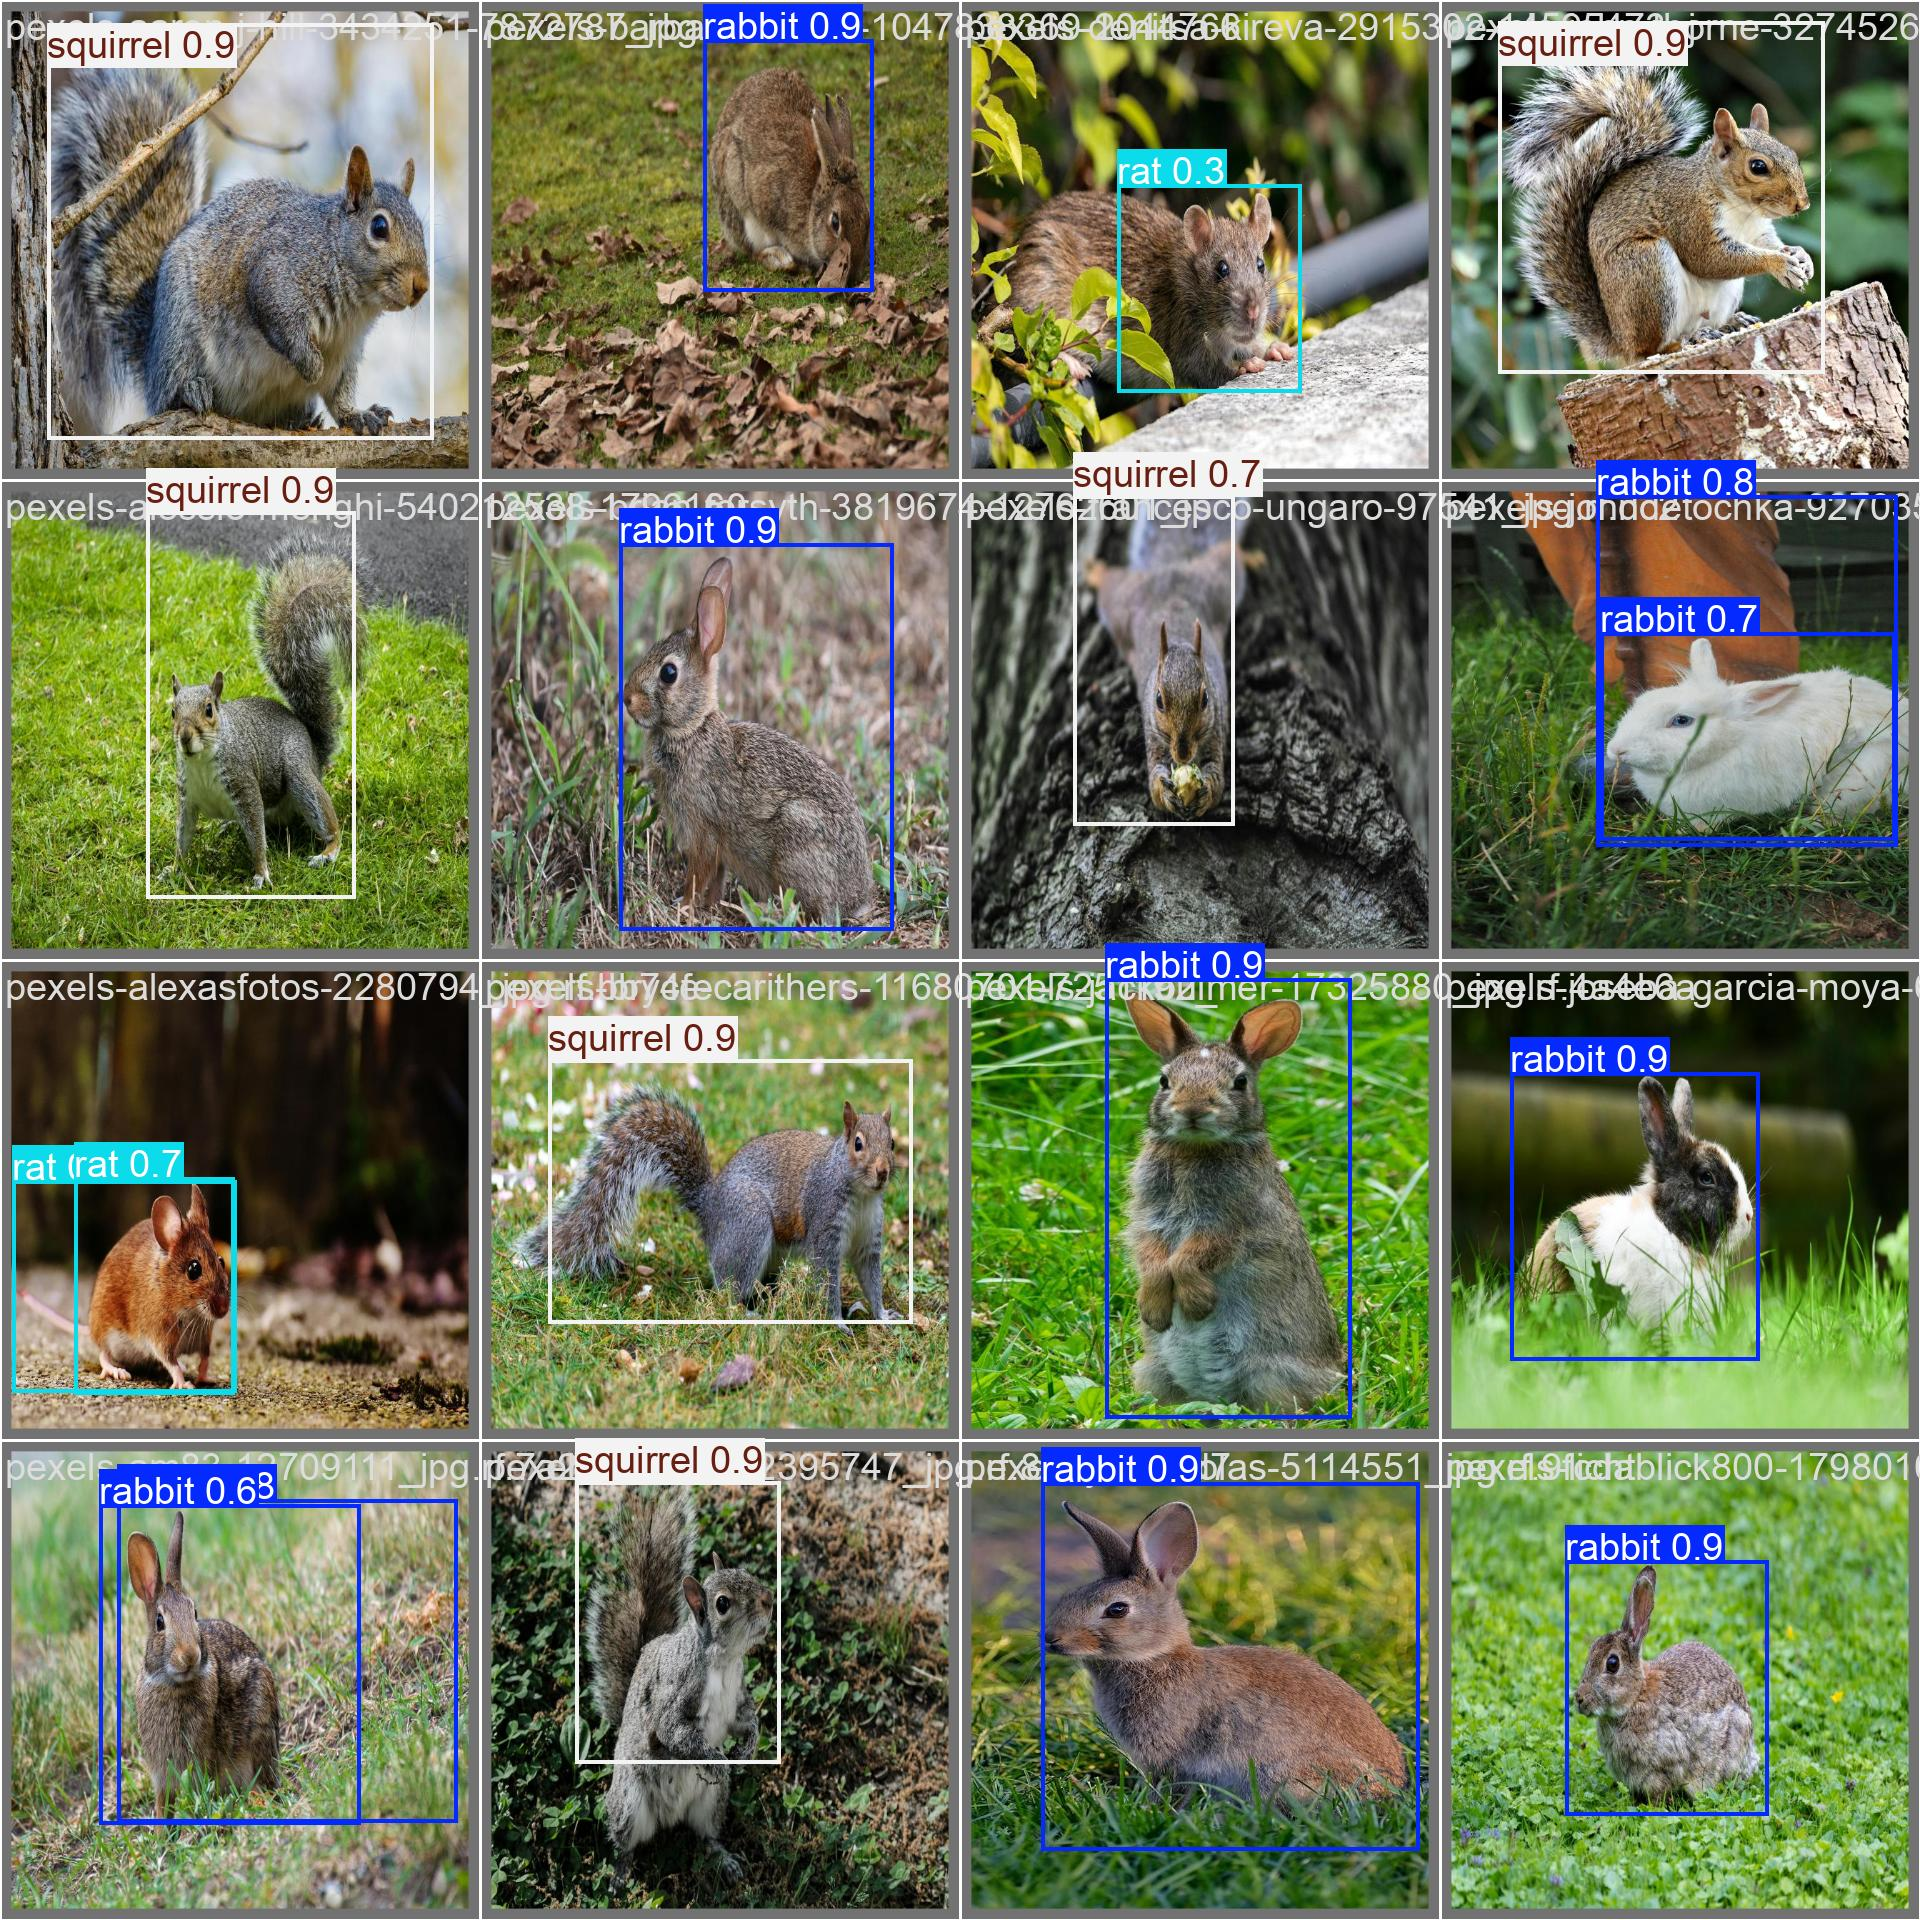

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val3/val_batch0_pred.jpg', width=600)

#Make prediction with model


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source="/content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8/test/images/pexels-jiri-mikolas-6546559_jpg.rf.a2e97a757a2e0bc3d4fa2db69e84fae9.jpg" save=True

/content
Ultralytics YOLOv8.2.41 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/gdrive/MyDrive/datasetAnimalDetection/GardenAnimalDetection.v1i.yolov8/test/images/pexels-jiri-mikolas-6546559_jpg.rf.a2e97a757a2e0bc3d4fa2db69e84fae9.jpg: 640x640 1 rabbit, 7.4ms
Speed: 3.8ms preprocess, 7.4ms inference, 548.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


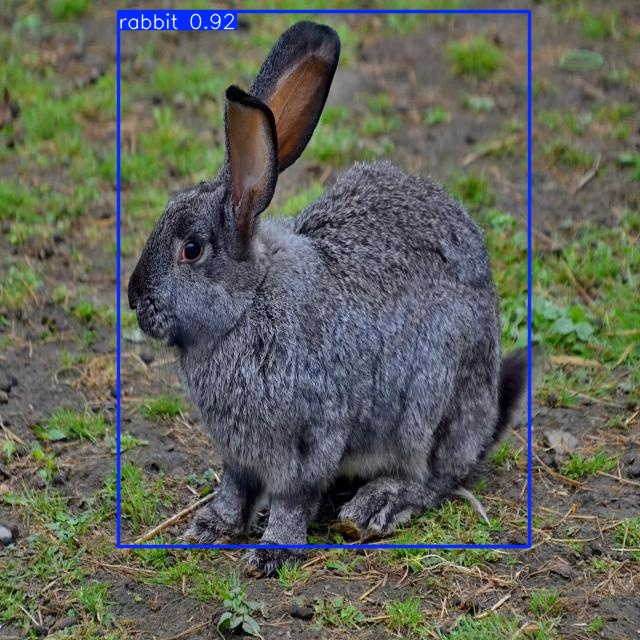

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict2/pexels-jiri-mikolas-6546559_jpg.rf.a2e97a757a2e0bc3d4fa2db69e84fae9.jpg', height=600)